#📌 Extracão

In [32]:
import requests
import pandas as pd
import numpy as np

In [255]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)

if response.status_code == 200:
    dados = response.json()
    print(dados[:2])
else:
    print("Erro:", response.status_code)

[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}, {'customerID': '0003-MKNFE', 'Churn': 'No', 'customer': {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, 'account': {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMeth

#🔧 Transformação

In [256]:
dados = pd.json_normalize(dados)
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [257]:
dados.drop('account.PaperlessBilling', axis=1, inplace=True)

In [258]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [259]:
colunasString = ['customerID', 'customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']

for col in colunasString:
    dados[col] = dados[col].replace(r'^\s*$', np.nan, regex=True)

    dados[col] = dados[col].astype('string')

In [260]:
dados['account.Charges.Total'].replace(' ', np.nan, inplace=True)

dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'])

somaPorCliente = dados.groupby('customerID')['account.Charges.Total'].transform('sum')

dados['account.Charges.Total'] = somaPorCliente

/tmp/ipython-input-2410868817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['account.Charges.Total'].replace(' ', np.nan, inplace=True)


In [261]:
colunasInt = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService']

for col in colunasInt:
    dados[col] = dados[col].map({'Yes': 1, 'No': 0})

In [262]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null   strin

In [264]:
dados = dados.dropna(subset=['Churn'])

In [265]:
dados['Churn'] = dados['Churn'].astype(np.int64)

/tmp/ipython-input-2344292170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Churn'] = dados['Churn'].astype(np.int64)


In [267]:
dados.reset_index(inplace = True,drop=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   string 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   string 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   string 
 9   internet.InternetService   7043 non-null   string 
 10  internet.OnlineSecurity    7043 non-null   string 
 11  internet.OnlineBackup      7043 non-null   string 
 12  internet.DeviceProtection  7043 non-null   string 
 13  internet.TechSupport       7043 non-null   strin

In [268]:
dados['account.Charges.Diarias'] = (dados['account.Charges.Monthly'] / 30).round(2)

/tmp/ipython-input-3501043697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['account.Charges.Diarias'] = (dados['account.Charges.Monthly'] / 30).round(2)


#📊 Carga e análise

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
dados.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.Charges.Monthly,account.Charges.Total,account.Charges.Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.960000


In [271]:
contagem_churn = dados['Churn'].value_counts()

print(contagem_churn)

Churn
0    5174
1    1869
Name: count, dtype: int64


/tmp/ipython-input-2146920182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='Churn', palette='Set2')


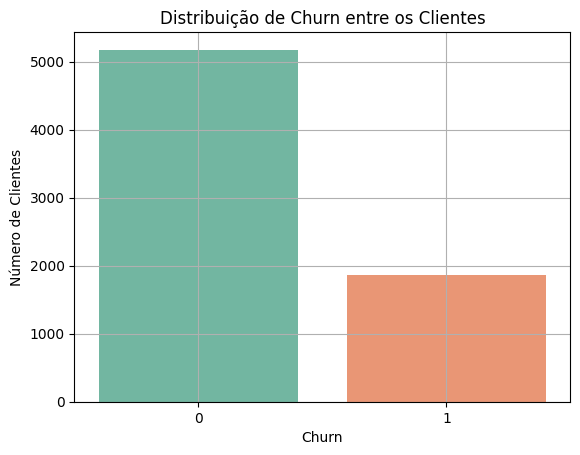

In [274]:
sns.countplot(data=dados, x='Churn', palette='Set2')
plt.title('Distribuição de Churn entre os Clientes')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.grid()
plt.show()

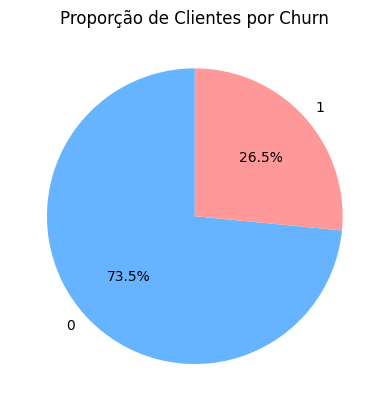

In [273]:
contagem_churn.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Proporção de Clientes por Churn')
plt.ylabel('')  # Remove o label do eixo y
plt.show()

In [276]:
tabela_genero = pd.crosstab(dados['customer.gender'], dados['Churn'], normalize='index') * 100
print(tabela_genero)

Churn                    0          1
customer.gender                      
Female           73.079128  26.920872
Male             73.839662  26.160338


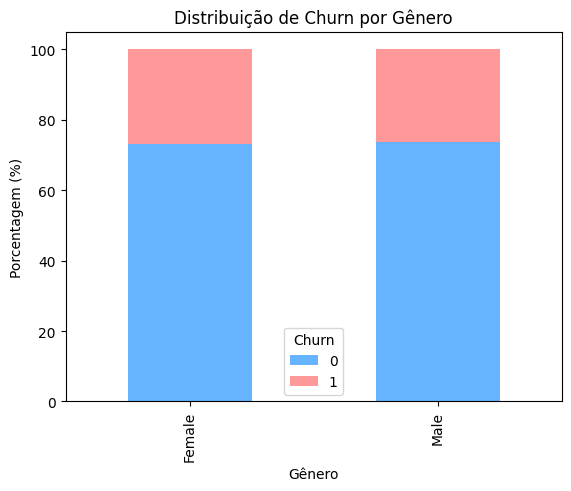

In [277]:
tabela_genero.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'])
plt.title('Distribuição de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Churn')
plt.show()

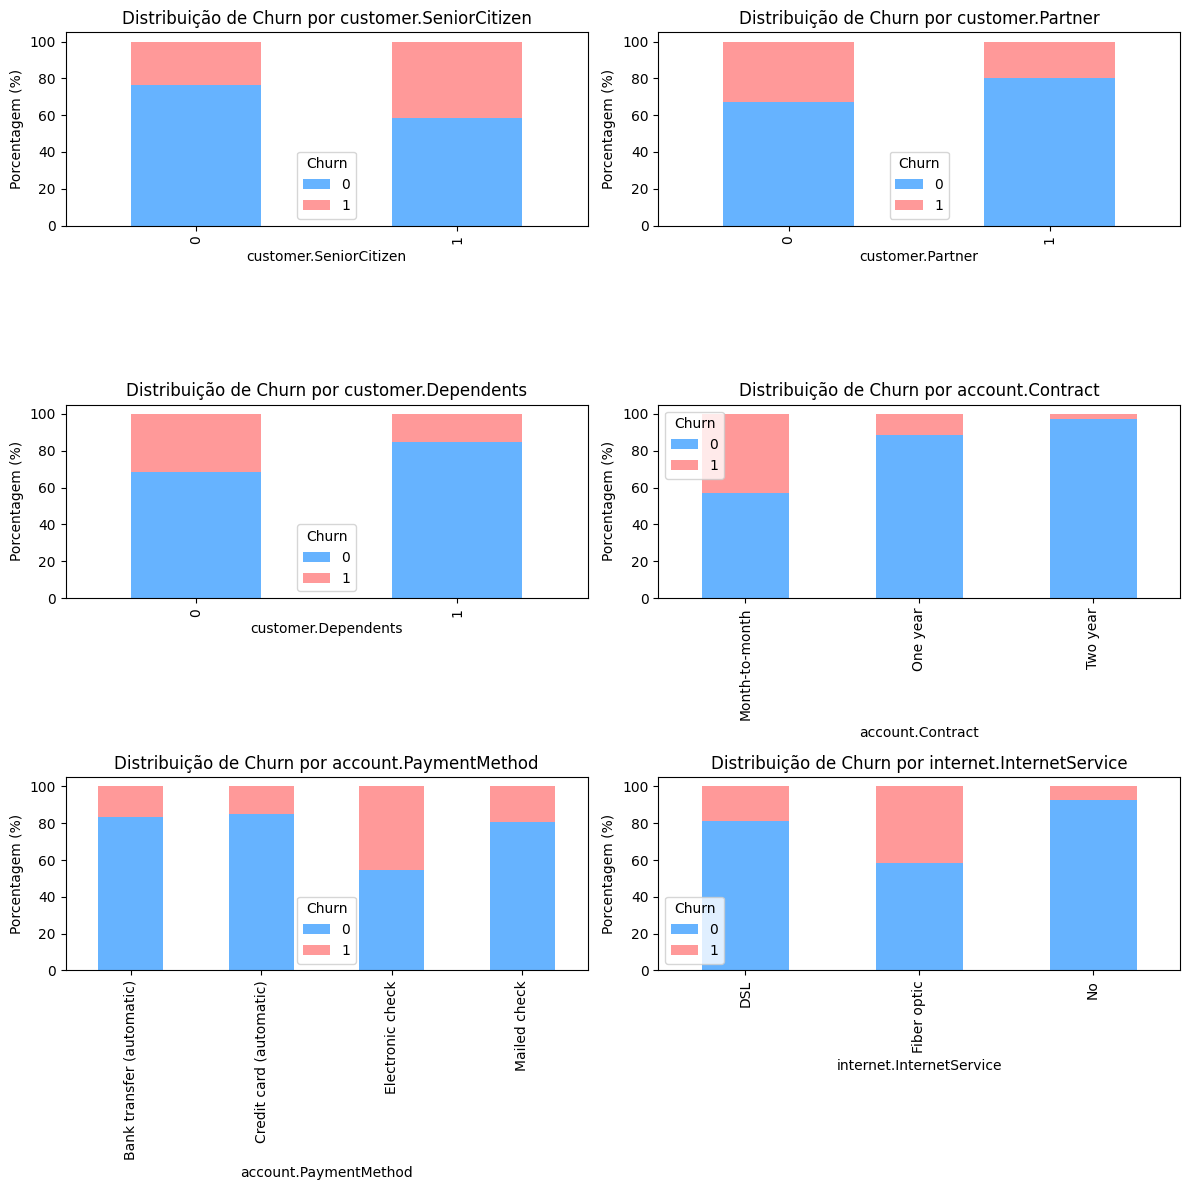

In [281]:
categoricas = ['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']

num_graficos = len(categoricas)
num_cols = 2
num_rows = (num_graficos + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    tabela = pd.crosstab(dados[col], dados['Churn'], normalize='index') * 100
    tabela.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'], ax=axes[i])
    axes[i].set_title(f'Distribuição de Churn por {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Porcentagem (%)')
    axes[i].legend(title='Churn')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-1689765338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dados, palette='Set2', ax=axes[i])
/tmp/ipython-input-1689765338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dados, palette='Set2', ax=axes[i])
/tmp/ipython-input-1689765338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dados, palette='Set2', ax=axes[i])
/tmp/ipython-input-1689765338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

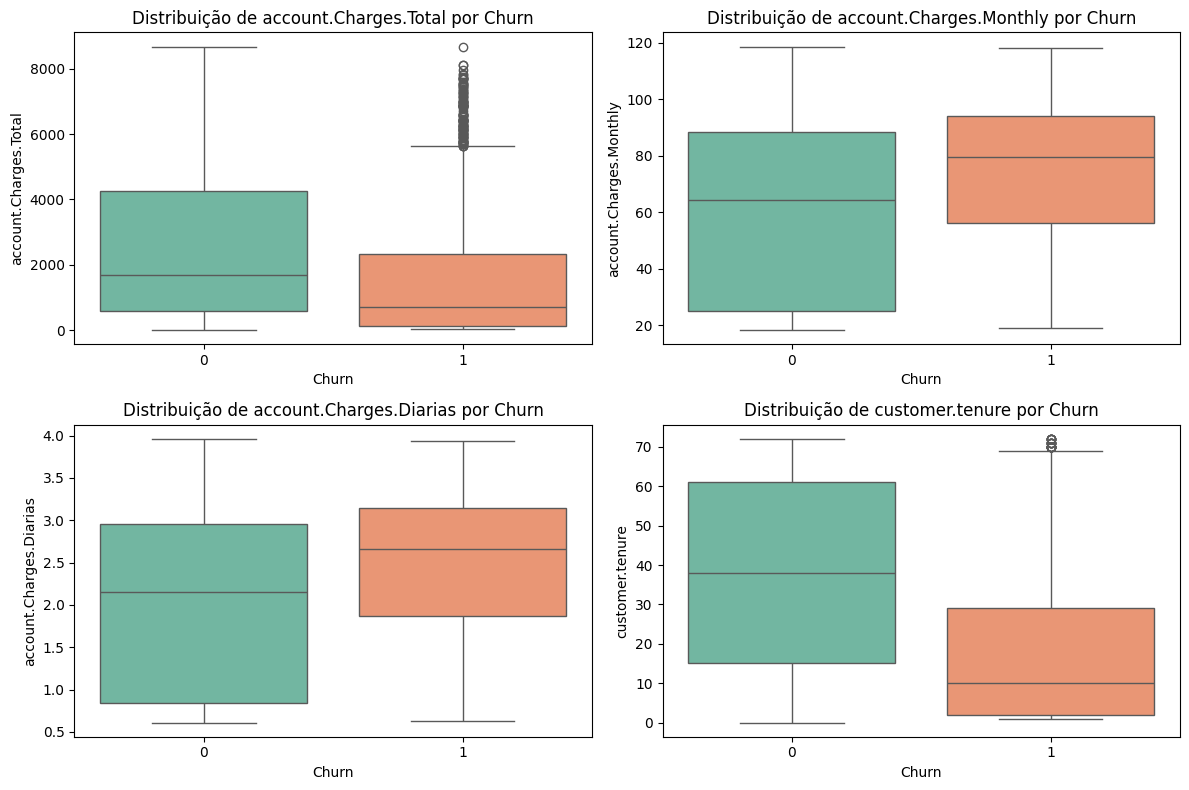

In [284]:
variaveis_numericas = ['account.Charges.Total', 'account.Charges.Monthly', 'account.Charges.Diarias', 'customer.tenure']

num_graficos = len(variaveis_numericas)
num_cols = 2
num_rows = (num_graficos + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(variaveis_numericas):
    sns.boxplot(x='Churn', y=col, data=dados, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribuição de {col} por Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#📄Relatorio Final

#**Relatório de Análise de Evasão de Clientes (Churn)**

##**1. Introdução**

O objetivo deste relatório é analisar o comportamento dos clientes de uma empresa, identificando fatores que contribuem para a evasão (Churn). A análise busca entender padrões de comportamento, perfis de clientes mais propensos a cancelar serviços e fornecer recomendações estratégicas para reduzir a evasão.

##**2. Limpeza e Tratamento de Dados**

Os dados foram preparados seguindo os seguintes passos:

- Importação dos dados: Leitura do arquivo CSV para um DataFrame do Pandas.

- Tratamento de valores nulos e coluna desnecessária: Foram identificados valores ausentes e tratados, além da exclusão de uma coluna desnecessária para a análise.

- Conversão de tipos: Colunas foram convertidas para os tipos corretos, garantindo consistência nos cálculos.

- Criação de colunas derivadas: Foi criada a coluna Contas_Diarias, calculada a partir do faturamento mensal, para permitir uma análise diária do comportamento financeiro dos clientes.

##**3. Análise Exploratória de Dados (EDA)**
###**3.1 Distribuição de Churn**

A análise inicial mostrou a proporção de clientes que permaneceram e os que saíram. Gráficos de barras e pizza revelaram que uma parcela significativa de clientes cancelou os serviços, evidenciando a necessidade de estratégias de retenção.

###**3.2 Churn por variáveis categóricas**

Ao analisar variáveis categóricas, como gênero, tipo de contrato, método de pagamento e serviço de internet, observou-se que certos perfis apresentam maior tendência à evasão. Por exemplo, clientes com contratos mensais tiveram uma taxa de churn maior do que aqueles com contratos anuais. Métodos de pagamento e tipos de serviço também mostraram padrões distintos de cancelamento.

###**3.3 Churn por variáveis numéricas**

As variáveis numéricas, como faturamento total (account.Charges.Total), faturamento mensal (account.Charges.Monthly), contas diárias (Contas_Diarias) e tempo de contrato, foram analisadas por meio de boxplots e histogramas. Os gráficos mostraram que clientes com menor tempo de contrato ou menor gasto mensal têm maior probabilidade de cancelar os serviços. Além disso, a distribuição das contas diárias forneceu insights sobre o comportamento financeiro diário dos clientes, confirmando tendências observadas no faturamento mensal.

##**4. Conclusões e Insights**

A análise revelou padrões claros sobre a evasão de clientes:

###**4.1 Distribuição de Churn: Cerca de 26,5% dos clientes cancelaram o serviço, enquanto 73,5% permaneceram.**

###**4.2 Variáveis categóricas:**

**Gênero:** Não há diferença significativa entre homens e mulheres em relação ao churn.

**Idosos (SeniorCitizen) e Parceria de clientes (Partner):** Clientes sem parceria ou mais jovens apresentam ligeiramente maior risco de churn.

**Dependentes (Dependents):** Clientes sem dependentes têm maior tendência a cancelar.

**Tipo de contrato (Contract):** Contratos mensais têm taxa de churn mais alta do que contratos anuais ou de dois anos.

**Método de pagamento (PaymentMethod):** Alguns métodos, como cobrança manual, apresentam maior evasão.

**Serviço de internet (InternetService):** Clientes com certos tipos de serviço (como Fiber) mostram maior risco de churn.

###**4.3 Variáveis numéricas:**

**Faturamento total (account.Charges.Total):** Clientes que cancelaram tendem a ter menor faturamento total acumulado.

**Faturamento mensal (account.Charges.Monthly):** Clientes com churn apresentam valores médios mensais ligeiramente maiores, sugerindo que custo mensal mais alto pode impactar a decisão de cancelar.

**Contas diárias (Contas_Diarias):** Distribuição relativamente uniforme, com leve aumento para clientes que saíram, indicando sensibilidade ao gasto diário.

**Tempo de contrato (customer.tenure):** Clientes com menor tempo de contrato têm maior probabilidade de cancelar, confirmando que clientes mais novos são mais vulneráveis à evasão.

Em resumo, clientes com contratos mensais, menor tempo de permanência, sem dependentes e com faturamento mais alto mensalmente apresentam maior risco de churn.

##**5. Recomendações**

Com base nos insights, as seguintes ações estratégicas são recomendadas:

**5.1 Foco em clientes de risco:** Priorizar retenção para clientes com contratos mensais e menor tempo de permanência.

**5.2 Incentivos financeiros:** Oferecer descontos, pacotes promocionais ou benefícios para clientes com gasto mensal mais elevado e alto risco de churn.

**5.3 Monitoramento de métricas diárias:** Acompanhar contas diárias para identificar sinais precoces de insatisfação ou comportamento de cancelamento iminente.

**5.4 Personalização de serviços:** Ajustar ofertas e métodos de pagamento para clientes com perfil de alto risco, aumentando a satisfação e fidelização.

**5.5 Programas de engajamento:** Criar estratégias para clientes sem dependentes ou sem parcerias, mantendo-os engajados com serviços adicionais ou recompensas.

###**Essas medidas podem reduzir a evasão e melhorar a retenção de clientes de forma mais direcionada e eficiente.**